# <center> IIIT Vadodara </center>
## <center> Winter 2022-23 </center>
## <center> CS/IT 308 Machine Learning Lab </center>
## <center> Lab#4 MMSE, Linear regression, and Logistic regression</center>

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy import misc
from numpy import linalg as la
import matplotlib.image as mpimg
import glob
from numpy import linalg as LA
import scipy.io as sio 

## <font color='blue'> MMSE

---

Refer class note



## <font color='red'> 1. Find the minimum mean squared error (MMSE) on following data.

In [ ]:
y = [11,20,19,17,10]
y_bar = [12,18,19.5,18,9]

# MSE = 1/N (Y-Y')^2
mse = np.square(np.subtract(y,y_bar)).mean()
print ("MSE : " , mse)

MSE :  1.45


## <font color='red'> 2 Given a sample space $S_{XY}={(0,0),(1,1),(2,2),(2,3)}$, with equiprobable outcomes, i.e., $p(0,0)=p(1,1)=p(2,2)=p(2,3)=\frac{1}{4}$. Estimate $\hat{Y}$ given X.


$$\hat{Y}=E(Y)+\frac{COV(X,Y)}{VAR(X)}(X-E(X))$$

Also calculate the mean squared error between $\hat{Y}$ and $Y$.


Hint: You can use the classnotes for help.

In [ ]:
#write code here
sx = np.array([0,1,2,2])
sy = np.array([0,1,2,3])
p = 0.25

# Calculate Expected Values of X and Y
Ex = p*np.sum(sx)
Ey = p*np.sum(sy)
print("E(X) : ",Ex)
print("E(Y) : ",Ey)

# Calculate VAR(X)
Ex2 = p*np.sum(np.square(sx))
VARx = np.subtract(Ex2,np.square(Ex))
print("E(X^2) : ",Ex2)
print("VAR(X) : ",VARx)

# Calculate Covariance COV(X,Y)
Exy = p*np.sum(np.dot(sx,sy)) 
Covxy = Exy - np.dot(Ex,Ey)
print("E(XY) : ",Exy)
print("COV(X,Y) : ",Covxy)

# Estimating Y'
y_bar = Ey + (Covxy/VARx) * (sx-Ex)
print("Y' : ",y_bar)

# Calculate MSE
mse = np.square(np.subtract(sy,y_bar)).mean()
print("MSE : ",mse)

E(X) :  1.25
E(Y) :  1.5
E(X^2) :  2.25
VAR(X) :  0.6875
E(XY) :  2.75
COV(X,Y) :  0.875
Y' :  [-0.09090909  1.18181818  2.45454545  2.45454545]
MSE :  0.13636363636363635


## <font color='blue'> Linear regression

---

Refer class note



## <font color='red'> 3. Perform linear regression on the given dataset and observe underfitting and overfitting capacity of the function.

In [ ]:
#example of dataset:
no_samples = 10

#Generate n = np.random.rand(no_samples) # Here data is zero mean
n = np.random.rand(no_samples)
n = n - n.mean()
print(n)

#Generate x between 0 and 2 using number of smaples
x = np.linspace(0,2,no_samples)
print(x)

#Generate function y dependent on x and n: y = x**2+2*n
y = x**2 + 2*n
print(y)

[-0.14450077 -0.08168504 -0.06896936  0.05451061  0.35285327 -0.22216579
  0.4230696  -0.3780174   0.16172521 -0.09682032]
[0.         0.22222222 0.44444444 0.66666667 0.88888889 1.11111111
 1.33333333 1.55555556 1.77777778 2.        ]
[-0.28900155 -0.11398737  0.05959214  0.55346567  1.49582999  0.79023631
  2.62391698  1.66371828  3.48394425  3.80635936]


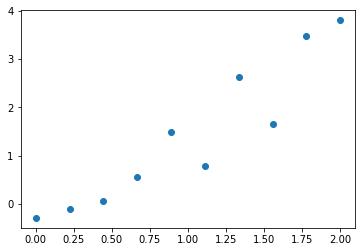

In [ ]:
# code to scatter plot x and y

plt.scatter(x,y)


#### Hint: Pseudo inverse
 $$Y = W^TX$$
 $$W = (X^TX)^{-1}X^TY$$ 

1. Take $y = \theta_0 + \theta_1 x$

In [ ]:
#Generate X1 by concatinating ones and x as shown in output
temp = np.ones((10), dtype=float)
X1 = np.column_stack((temp,x))

#Find W1 using pseudo inverse
W1 = la.inv(X1.T@X1)@X1.T@y

print(X1)
print(W1)

[[1.         0.        ]
 [1.         0.22222222]
 [1.         0.44444444]
 [1.         0.66666667]
 [1.         0.88888889]
 [1.         1.11111111]
 [1.         1.33333333]
 [1.         1.55555556]
 [1.         1.77777778]
 [1.         2.        ]]
[-0.65359697  2.06100437]


2. Take $y = \theta_0 + \theta_1 x + \theta_2 x^2 +\theta_3 x^3 +\theta_4 x^4+\theta_5 x^5$

In [ ]:
#Generate X2 by concatinating ones,x,x**2,x**3,x**4,x**5 
temp = np.ones((10), dtype=float)
X2 = np.column_stack((temp,x,x**2,x**3,x**4,x**5))

#Generate W2 using: W2= la.inv(X2.T@X2)@X2.T@y
W2 = la.inv(X2.T@X2)@X2.T@y

print(X2)
print(W2)

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 2.22222222e-01 4.93827160e-02 1.09739369e-02
  2.43865264e-03 5.41922810e-04]
 [1.00000000e+00 4.44444444e-01 1.97530864e-01 8.77914952e-02
  3.90184423e-02 1.73415299e-02]
 [1.00000000e+00 6.66666667e-01 4.44444444e-01 2.96296296e-01
  1.97530864e-01 1.31687243e-01]
 [1.00000000e+00 8.88888889e-01 7.90123457e-01 7.02331962e-01
  6.24295077e-01 5.54928957e-01]
 [1.00000000e+00 1.11111111e+00 1.23456790e+00 1.37174211e+00
  1.52415790e+00 1.69350878e+00]
 [1.00000000e+00 1.33333333e+00 1.77777778e+00 2.37037037e+00
  3.16049383e+00 4.21399177e+00]
 [1.00000000e+00 1.55555556e+00 2.41975309e+00 3.76406036e+00
  5.85520500e+00 9.10809667e+00]
 [1.00000000e+00 1.77777778e+00 3.16049383e+00 5.61865569e+00
  9.98872123e+00 1.77577266e+01]
 [1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01]]
[ -0.25311796  -1.9140245   11.45391561 -14.01828

3. Take $y = \theta_0 + \theta_1 x + \theta_2 x^2 $

In [ ]:
#Generate X3 by concatinating ones,x,x**2 
temp = np.ones((10), dtype=float)
X3 = np.column_stack((temp,x,x**2))

#Generate W3 using: W3= la.inv(X3.T@X3)@X3.T@y
W3 = la.inv(X3.T@X3)@X3.T@y

print(X3)
print(W3)

[[1.         0.         0.        ]
 [1.         0.22222222 0.04938272]
 [1.         0.44444444 0.19753086]
 [1.         0.66666667 0.44444444]
 [1.         0.88888889 0.79012346]
 [1.         1.11111111 1.2345679 ]
 [1.         1.33333333 1.77777778]
 [1.         1.55555556 2.41975309]
 [1.         1.77777778 3.16049383]
 [1.         2.         4.        ]]
[-0.31521801  0.9189754   0.57101449]


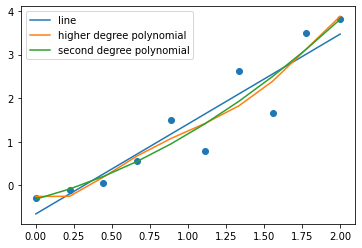

In [ ]:
fig = plt.figure()
plt.scatter(x,y)

#Generate y_p1 = X1@W1
#Generate y_p2 = X2@W2
#Generate y_p3 = X3@W3
y_p1 = X1@W1
y_p2 = X2@W2
y_p3 = X3@W3


#Plot x,y_p1
#plot x,y_p2
#plot x,y_p3
plt.plot(x,y_p1,label="line")
plt.plot(x,y_p2,label="higher degree polynomial")
plt.plot(x,y_p3,label="second degree polynomial")
plt.legend()

## <font color='blue'> Brief about **Gradient descent**:
---


Given a system $Ax=b$, we find $x$ for given observations $b$ and coeffiecient matrix $A$. When $b$ is not in column space of $A$, then $Ax \neq b$ and we need to find $x$ in such a way that $Ax \approx b$.

<br>
Linear least square is one of the methods to estimate $x$ by minimizing the mean square error as, $\min ||Ax-b||_2$. This can be written as,
        
$\underset{x}{\mathrm{argmin}}||Ax-b||_{2}^{2} = f(x)$

We need to find $x$ in such a way that $f(x)$ will be minimum in $L_2$ norm. 

<br>


We will solve this by applying gradient descent algortithm on $f(x)$. 
<br>
To apply this algorithm we need to find gradient of the function, i.e.,
<br>
              $\Delta_x f(x)= A^T(Ax-b) = A^TAx-A^Tb$

<br>


Optimisation for least-squares
<br>
$||A^TAx-A^Tb||_2>\delta$, $\delta$ is the small positive number indicating tolerance.

<br>

Now we will find new x iteratively using step size $\alpha$ to find the best fit for $AX=b$ as:

<br>
$x^{[n+1]}=x^{[n]}-\alpha (A^TAx-A^Tb)$.
<br>

We need to choose $\alpha$, $\delta$ and $x^{[0]}$ to iterate until $x^{[n+1]} \rightarrow x^{[n]}$.

##  <font color='blue'> Logistic regression

---
Cost funcion for logistic regression,
$$
\begin{aligned}
J(\theta) &=\frac{1}{m} \sum_{i=1}^{m} \cos t\left(h_{\theta}\left(x^{i}\right), y^{\prime}\right) \\
&=-\frac{1}{m}\left[\sum_{i=1}^{m} y^{i} \log h_{\theta}\left(x^{i}\right)+\left(1-y^{i}\right)\right.\log \left(1-\log \left(x^{i}\right)\right]\\
h(x)&=\frac{1}{1+e^{-\Theta^Tx}}
\end{aligned}
$$
So, using gradient descent
$$
\Theta_{i+1}=\Theta_{i}-\frac{\alpha}{m} \sum_{i=1}^{m}\left(h\left(x^{i} \Theta\right)-y^{i}\right)
$$
iterate till $$
\Theta_{i+1} \cong \Theta_{i}
$$




## <font color='red'> 4. Perform logistic regression on the dataset given below.
Here, to classify 2D data,
decision line can be given as,
$$\theta_0+\theta_1x+\theta_2y=0$$
Let, $$\Theta^T=\begin{bmatrix}
\theta_0\\
\theta_1\\
\theta_2
\end{bmatrix}$$

In [ ]:
#Dataset example
X = np.array([[0,0,0],[0,1,0],[0,2,0],[0,3,1],[1,0,0],[1,1,0],[1,2,1],[1,3,1],[2,0,0],[2,1,1],[2,2,1],[2,3,1]])
Xb = X
print("x|y|class")
print(Xb)

x|y|class
[[0 0 0]
 [0 1 0]
 [0 2 0]
 [0 3 1]
 [1 0 0]
 [1 1 0]
 [1 2 1]
 [1 3 1]
 [2 0 0]
 [2 1 1]
 [2 2 1]
 [2 3 1]]


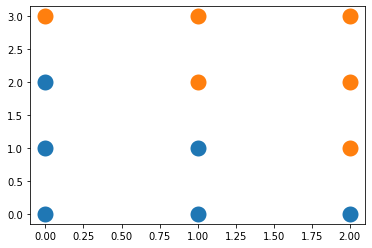

In [ ]:
#Generate scatter plot of X
uq = np.unique(X[:,-1])
for i in uq:
    cl1 = X[X[:,-1]==i]
    plt.scatter(cl1[:,0], cl1[:,1],linewidth=10)

In [ ]:
# Generate X by concatinating ones and X
X1 = np.column_stack((np.ones(12),X))
X2 = X1[:,:-1]
Xc = X1[:,-1]

def getcost(X,theta):
  cost = 1/(1+np.exp(X@theta))
  return cost

In [ ]:
#write code for gradient descent to find thetas
theta = np.random.normal(size=(3, 1))
learning_rate = 0.01

for it in range(500):
    for i in range(len(X1)):
        cost = getcost(X2[i], theta)
        for j in range(len(X2[i])):
            theta[j] += learning_rate * (cost - Xc[i]) * X2[i][j]

print("theta : \n", theta)

theta : 
 [[ 3.7727444 ]
 [-1.33542267]
 [-1.83206647]]


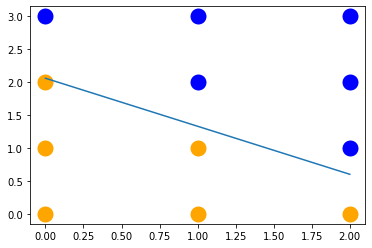

In [ ]:
#plot decision boundry 
Y = -(theta[0] + theta[1]*X1[:,1])/theta[2]
plt.figure()
for i in range(len(X)):
  if X1[i][3] == 0:
    plt.scatter(X1[i][1],X1[i][2],c = 'ORANGE',linewidth=10)
  elif X1[i][3] == 1:
    plt.scatter(X1[i][1],X1[i][2],c = 'BLUE',linewidth=10)
plt.plot(X1[:,1],Y)
plt.show()